In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Doading Dataset

In [6]:
X = pd.read_csv('data/playlists.csv')

In [7]:
X

danceability  energy  loudness  speechiness  acousticness  \
0            0.707   0.681    -4.325       0.0668       0.06320   
1            0.644   0.735    -5.747       0.0391       0.05210   
2            0.696   0.809    -8.254       0.0500       0.25200   
3            0.538   0.742    -5.355       0.1140       0.13800   
4            0.662   0.398    -6.691       0.0275       0.71600   
...            ...     ...       ...          ...           ...   
2418         0.636   0.656    -7.123       0.3440       0.02190   
2419         0.753   0.424   -10.620       0.5990       0.19700   
2420         0.501   0.699    -4.733       0.2480       0.17100   
2421         0.645   0.842    -3.023       0.0983       0.00816   
2422         0.902   0.544    -8.242       0.2420       0.15300   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.000005    0.0322    0.646  117.999  0yLdNVWF3Srea0uzk55zFn   
1             0.144000    0.1610    0.418   88.980  1Qrg8KqiBpW07V7PNxwwwL   
2             0.000128    0.2480    0.857  132.962  6AQbmUe0Qwf5PZnt4HmTXv   
3             0.000047    0.0934    0.250   96.107  5Z2MiIZ5I3jJvvmeWMLbOQ   
4             0.000000    0.1110    0.468  107.001  4sx6NRwL6Ol3V6m9exwGlQ   
...                ...       ...      ...      ...                     ...   
2418          0.000000    0.1300    0.362   75.962  2nLwnTorexhx3qKRY7zymH   
2419          0.000000    0.0694    0.714  162.878  5ckdswsm7RQzCTBoNiyl7T   
2420          0.000000    0.1230    0.671   85.267  7rGzPK1JTUn91efeiIidNo   
2421          0.000000    0.3960    0.237  150.039  2kMuUWfsueRPYWxyaTSHd8   
2422          0.000000    0.1110    0.136  131.912  7b4LMdMrjPLNUNwxO46sQR   

      duration_ms  
0          200455  
1          153947  
2          131013  
3          272373  
4          145850  
...           ...  
2418       177012  
2419       100180  
2420       201124  
2421       121600  
2422       160000  

[2423 rows x 11 columns]

In [8]:
X.describe()

danceability       energy     loudness  speechiness  acousticness  \
count   2423.000000  2423.000000  2423.000000  2423.000000   2423.000000   
mean       0.604803     0.565495   -10.140818     0.105301      0.338065   
std        0.171495     0.266795     7.508789     0.115157      0.348887   
min        0.107000     0.002900   -40.436000     0.022700      0.000005   
25%        0.479000     0.435000   -10.846500     0.036400      0.039550   
50%        0.608000     0.617000    -7.495000     0.050600      0.193000   
75%        0.738000     0.768500    -5.502500     0.122000      0.595000   
max        0.975000     0.996000     0.844000     0.909000      0.996000   

       instrumentalness     liveness      valence        tempo    duration_ms  
count       2423.000000  2423.000000  2423.000000  2423.000000    2423.000000  
mean           0.143268     0.164677     0.508754   118.764596  200770.492365  
std            0.319360     0.126002     0.248397    29.464144   60145.674977  
min            0.000000     0.010400     0.036400    46.877000   70160.000000  
25%            0.000000     0.094400     0.308000    95.418000  156986.000000  
50%            0.000011     0.115000     0.497000   117.932000  190960.000000  
75%            0.005310     0.192000     0.714500   137.007000  233175.500000  
max            0.975000     0.893000     0.985000   208.571000  547107.000000

In [10]:
# Extract numerical cols
X_num = X.select_dtypes(include=['float64', 'int64'])

In [13]:
X_num

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2423 non-null   float64
 1   energy            2423 non-null   float64
 2   loudness          2423 non-null   float64
 3   speechiness       2423 non-null   float64
 4   acousticness      2423 non-null   float64
 5   instrumentalness  2423 non-null   float64
 6   liveness          2423 non-null   float64
 7   valence           2423 non-null   float64
 8   tempo             2423 non-null   float64
 9   duration_ms       2423 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 189.4 KB


## Scaling features

In [15]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_num.columns)
display(X_num.head())
print()
display(X_scaled_df.head())

danceability  energy  loudness  speechiness  acousticness  \
0         0.707   0.681    -4.325       0.0668        0.0632   
1         0.644   0.735    -5.747       0.0391        0.0521   
2         0.696   0.809    -8.254       0.0500        0.2520   
3         0.538   0.742    -5.355       0.1140        0.1380   
4         0.662   0.398    -6.691       0.0275        0.7160   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000005    0.0322    0.646  117.999       200455  
1          0.144000    0.1610    0.418   88.980       153947  
2          0.000128    0.2480    0.857  132.962       131013  
3          0.000047    0.0934    0.250   96.107       272373  
4          0.000000    0.1110    0.468  107.001       145850

danceability    energy  loudness  speechiness  acousticness  \
0      0.596043  0.433025  0.774695    -0.334403     -0.787999   
1      0.228609  0.635469  0.585278    -0.574993     -0.819821   
2      0.531888  0.912893  0.251333    -0.480320     -0.246737   
3     -0.389612  0.661712  0.637494     0.075556     -0.573558   
4      0.333590 -0.627934  0.459532    -0.675745      1.083483   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.448685 -1.051603  0.552641 -0.025989    -0.005247  
1          0.002294 -0.029185 -0.365433 -1.011085    -0.778662  
2         -0.448300  0.661424  1.402261  0.481953    -1.160048  
3         -0.448555 -0.565795 -1.041908 -0.769147     1.190730  
4         -0.448701 -0.426086 -0.164101 -0.399334    -0.913313

## Choosing Number of Clusters

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

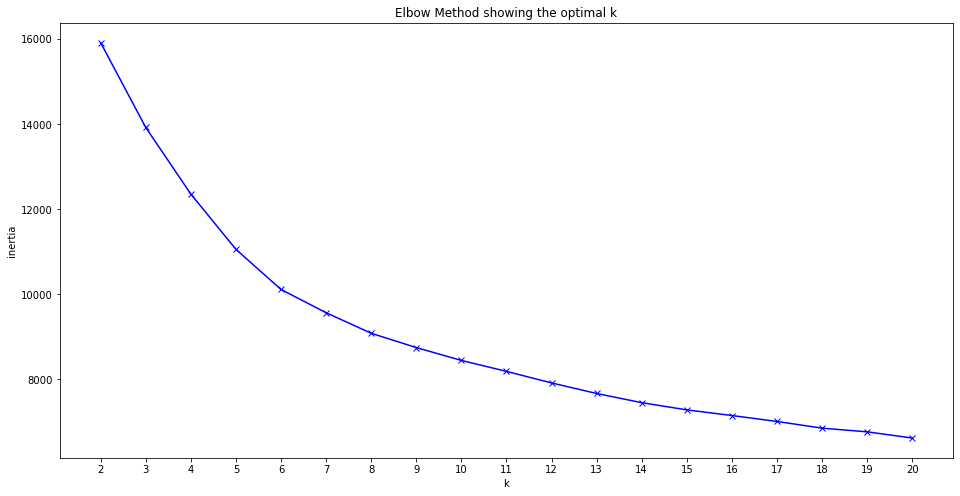

In [17]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

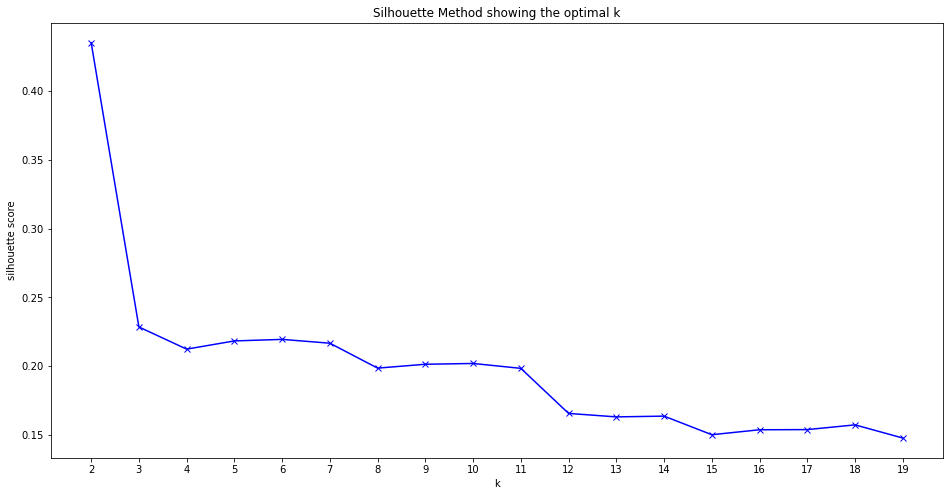

In [19]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Clustering the tracks with K-Means

In [27]:
kmeans = KMeans(n_clusters = 6, random_state = 1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [28]:
kmeans.labels_

array([5, 5, 5, ..., 3, 4, 3], dtype=int32)

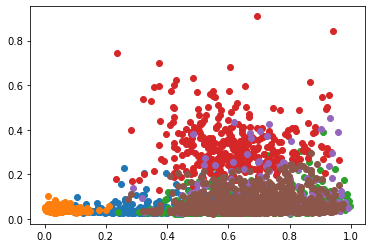

In [29]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
# show the plot
pyplot.show()

In [30]:
labels

array([5, 5, 5, ..., 3, 4, 3], dtype=int32)

In [31]:
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index()

0    323
1    308
2    454
3    367
4    255
5    716
dtype: int64

In [32]:
X["cluster"] = clusters
X

danceability  energy  loudness  speechiness  acousticness  \
0            0.707   0.681    -4.325       0.0668       0.06320   
1            0.644   0.735    -5.747       0.0391       0.05210   
2            0.696   0.809    -8.254       0.0500       0.25200   
3            0.538   0.742    -5.355       0.1140       0.13800   
4            0.662   0.398    -6.691       0.0275       0.71600   
...            ...     ...       ...          ...           ...   
2418         0.636   0.656    -7.123       0.3440       0.02190   
2419         0.753   0.424   -10.620       0.5990       0.19700   
2420         0.501   0.699    -4.733       0.2480       0.17100   
2421         0.645   0.842    -3.023       0.0983       0.00816   
2422         0.902   0.544    -8.242       0.2420       0.15300   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.000005    0.0322    0.646  117.999  0yLdNVWF3Srea0uzk55zFn   
1             0.144000    0.1610    0.418   88.980  1Qrg8KqiBpW07V7PNxwwwL   
2             0.000128    0.2480    0.857  132.962  6AQbmUe0Qwf5PZnt4HmTXv   
3             0.000047    0.0934    0.250   96.107  5Z2MiIZ5I3jJvvmeWMLbOQ   
4             0.000000    0.1110    0.468  107.001  4sx6NRwL6Ol3V6m9exwGlQ   
...                ...       ...      ...      ...                     ...   
2418          0.000000    0.1300    0.362   75.962  2nLwnTorexhx3qKRY7zymH   
2419          0.000000    0.0694    0.714  162.878  5ckdswsm7RQzCTBoNiyl7T   
2420          0.000000    0.1230    0.671   85.267  7rGzPK1JTUn91efeiIidNo   
2421          0.000000    0.3960    0.237  150.039  2kMuUWfsueRPYWxyaTSHd8   
2422          0.000000    0.1110    0.136  131.912  7b4LMdMrjPLNUNwxO46sQR   

      duration_ms  cluster  
0          200455        5  
1          153947        5  
2          131013        5  
3          272373        2  
4          145850        0  
...           ...      ...  
2418       177012        3  
2419       100180        3  
2420       201124        3  
2421       121600        4  
2422       160000        3  

[2423 rows x 12 columns]

In [33]:
X.to_csv('data/playlists_clustered.csv', index = False)